In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh_tridiagonal

In [11]:
#Insert Actual Quantities Here
alpha = 20
N = 10
m_r = 1.44*10**(-25)
dims = 2*N + 1
k_l_r = 2 * np.pi / 829
#hbar_real = np.hbar
#What we use in lattice
m = 1
hbar_scaled = 1
k_l = 1


<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
C:\Users\kirlo\AppData\Local\Temp\ipykernel_45224\609124204.py:32: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('q Value ($\hbar k$)')


[[ -2.8950403    0.92909377   4.61816386 ... 180.5176513  180.67321919
  220.65596213]
 [ -2.89504155   0.92912129   4.61771723 ... 180.3267659  180.86412822
  220.44503549]
 [ -2.89504529   0.92920383   4.61638034 ... 180.13598153 181.05513837
  220.23420993]
 ...
 [ -2.89504529   0.92920383   4.61638034 ... 180.13598153 181.05513837
  220.23420993]
 [ -2.89504155   0.92912129   4.61771723 ... 180.3267659  180.86412822
  220.44503549]
 [ -2.8950403    0.92909377   4.61816386 ... 180.5176513  180.67321919
  220.65596213]]


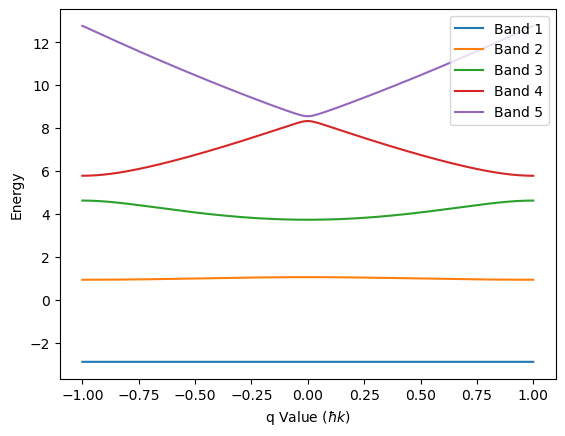

In [13]:
#Building a function which can solve the equation
def H_builder(alpha, N, q, hbar_scaled, k_l, m):
    E_r = (hbar_scaled**2)*(k_l**2)/(2*m)
    V_0 = alpha*E_r
    main_diag = np.zeros(dims)
    for i in range(-N, N+1):
        main_diag[i+N] = (((2*i+q)/hbar_scaled*k_l)**2*E_r)
    offset_diag = np.full(dims-1, V_0/4)
    H = np.zeros((dims,dims), dtype= float)
    np.fill_diagonal(H, main_diag)
    np.fill_diagonal(H[1:], offset_diag)
    np.fill_diagonal(H[:,1:], offset_diag)
    return H, main_diag, offset_diag

q_vals = np.linspace(-hbar_scaled*k_l, hbar_scaled*k_l, 200)
energy_bands = np.zeros((len(q_vals), 2*N+1))

for i, q in enumerate(q_vals):
    H, main_diag, offset_diag = H_builder(alpha, N, q, hbar_scaled, k_l, m)
    eigenvalues = sp.linalg.eigh_tridiagonal(main_diag, offset_diag)[0]
    energy_bands[i, :] = eigenvalues  

print(energy_bands)
#Plotting the energy bands
lines = []
for band in range(5):
    line, = plt.plot(q_vals, energy_bands[:, band], label=f'Band {band + 1}')
    lines.append(line)

#plotting lattice depth as a horizontal line
#plt.axhline(y=alpha, color='k', linestyle='--', label='Lattice Depth')
plt.xlabel('q Value ($\hbar k$)')
plt.ylabel('Energy')

# Create a custom legend showing band labels with their respective colors
plt.legend(handles=lines, labels=[f'Band {i+1}' for i, line in enumerate(lines)])

plt.show()
